<a href="https://colab.research.google.com/github/IvanNeverov/DepositsProject/blob/main/Modelling%20TDA%20Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импортируем библиотеки

In [1]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 6.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool

import seaborn as sb

## Загружаем данные, делаем первичный анализ

Значения переменных yes/no заранее заменил на 1и0 

In [3]:
data = pd.read_excel('/content/dataset.xlsx')

In [4]:
data.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,0,0,1,1,unknown,5,may,562,2,-1,0,unknown,1


In [5]:
data.shape

(11162, 17)

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

In [7]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
data.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,0.015051,1528.538524,0.473123,0.130801,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,0.121761,3225.413326,0.499299,0.337198,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,122.000000,0.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,550.000000,0.000000,0.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1708.000000,1.000000,0.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [9]:
data.describe(include='object')

,job,marital,education,contact,month,poutcome
count,11162,11162,11162,11162,11162,11162
unique,12,3,4,3,12,4
top,management,married,secondary,cellular,may,unknown
freq,2566,6351,5476,8042,2824,8326


AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


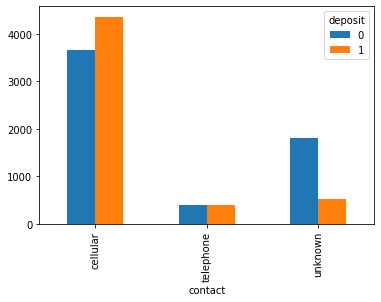

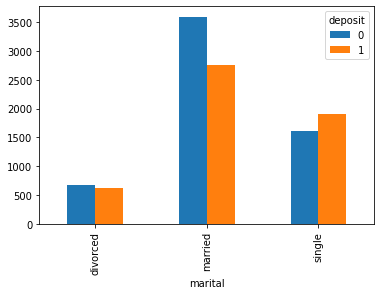

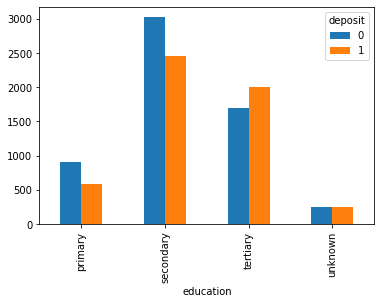

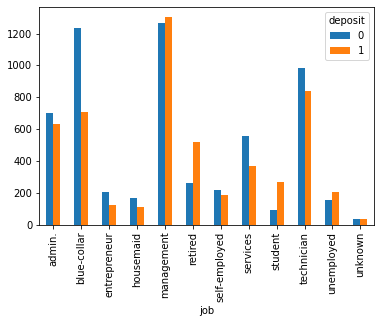

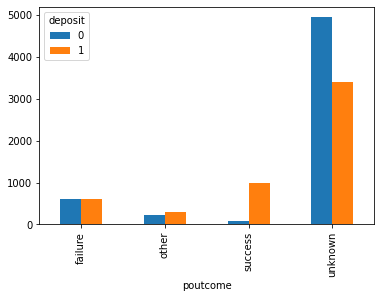

In [49]:
print(pd.crosstab(data.contact,data.deposit).plot(kind='bar'), 
        pd.crosstab(data.marital,data.deposit).plot(kind='bar'),
           pd.crosstab(data.education,data.deposit).plot(kind='bar'),
              pd.crosstab(data.job,data.deposit).plot(kind='bar'),
                  pd.crosstab(data.poutcome,data.deposit).plot(kind='bar'))

In [10]:
corr = data.corr() # строим матрицу корреляций

corr.style.background_gradient(cmap='coolwarm')

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
default,-0.011425,1.000000,-0.060954,0.011076,0.076434,0.017342,-0.009760,0.030975,-0.036282,-0.035273,-0.040680
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,-0.014770,0.035051,0.006660,0.064497,-0.000840,-0.203888
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,0.017269,-0.001914,0.034722,-0.030416,-0.022668,-0.110580
day,-0.000762,0.017342,0.010467,-0.014770,0.017269,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,-0.036282,0.017411,0.064497,-0.030416,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867


In [52]:
data.contact.value_counts()
data.drop(['poutcome'], axis=1, inplace = True)

## Строим логистическую регрессию без категориальных переменных

Этап моделирования 

In [53]:
X = data.drop('deposit', axis=1) # матрица объект-признак
y = data['deposit'] # целевая переменная

Сносим категориальные переменные

In [54]:
X_num = X.drop(['job','marital','education','contact','month','poutcome'], axis=1)

KeyError: ignored

Разбиваем на выборки

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain_num, Xtest_num, ytrain_num, ytest_num = train_test_split(X_num, y, test_size=0.25, random_state=42)

Нормируем данные

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain_num)

Xtrain = pd.DataFrame(ss.transform(Xtrain_num), columns=X_num.columns)
Xtest = pd.DataFrame(ss.transform(Xtest_num), columns=X_num.columns)

Xtrain.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,1.581951,-0.122118,2.083507,1.059464,2.545739,0.284318,-0.785527,1.662174,-0.474357,-0.365571
1,0.823300,8.188828,-0.500178,1.059464,-0.392813,-0.545702,-0.258692,-0.183877,1.979568,2.348973
2,-1.115476,8.188828,-0.812078,1.059464,-0.392813,-1.138573,0.982105,-0.183877,-0.474357,-0.365571
3,-0.946887,-0.122118,0.925652,1.059464,-0.392813,0.640040,0.561789,0.554543,-0.474357,-0.365571
4,-0.862592,-0.122118,0.321128,-0.943873,-0.392813,-0.071405,-0.342179,-0.553088,1.225928,0.991701


Оцениваем модель

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # объявление модели
model.fit(Xtrain_num, ytrain_num) # обучение модели

LogisticRegression()

In [57]:
pred_test = model.predict(Xtest_num) # предсказание классов
pred_test_proba = model.predict_proba (Xtest_num)
pred_test

array([0, 1, 1, ..., 0, 0, 1])

Оцениваем результаты

In [58]:
accuracy_score(ytest_num, pred_test)

0.7660336796847008

array([[1173,  277],
       [ 376,  965]])

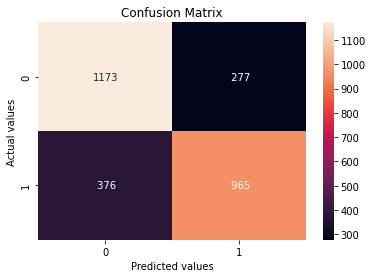

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sb


conf_mx = confusion_matrix(ytest_num, pred_test)
sb.heatmap(conf_mx,annot=True,fmt='4.0f')
plt.title('Confusion Matrix', size = 12)
plt.xlabel ('Predicted values')
plt.ylabel ('Actual values')
conf_mx

In [60]:
ytest_num.value_counts()

0    1450
1    1341
Name: deposit, dtype: int64

In [61]:
from sklearn.metrics import recall_score

recall_score(ytest_num, pred_test)

0.7196122296793438

In [62]:
from sklearn.metrics import precision_score

precision_score(ytest_num, pred_test)

0.7769726247987118

In [63]:
from sklearn.metrics import f1_score

f1_score(ytest_num, pred_test)

0.7471931862175765

In [64]:
coef_table = pd.DataFrame({'features' : list(X_num.columns), 'weights' : list(model.coef_[0])})
coef_table.sort_values(by='weights')

,features,weights
7,campaign,-4.824857
3,housing,-1.168625
4,loan,-0.657160
1,default,-0.473921
0,age,-0.246424
5,day,-0.205433
2,balance,1.786341
8,pdays,2.694849
9,previous,4.164087
6,duration,15.687043


## Обучаем KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

array([[1130,  320],
       [ 312, 1029]])

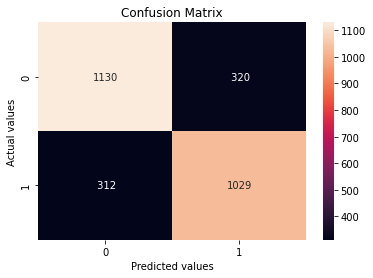

In [66]:
knn.fit(Xtrain_num, ytrain_num)
pred_test_knn = knn.predict(Xtest_num)
pred_test2 = knn.predict_proba(Xtest_num)[:,1]

classes2 = pred_test2 > 0.5

conf_mx2 = confusion_matrix(ytest_num, classes2)
sb.heatmap(conf_mx2,annot=True,fmt='4.0f')
plt.title('Confusion Matrix', size = 12)
plt.xlabel ('Predicted values')
plt.ylabel ('Actual values')
conf_mx2

Оцениваем KNN

In [67]:
from sklearn.metrics import recall_score

recall_score(ytest_num, classes2)

0.767337807606264

In [68]:
from sklearn.metrics import precision_score

precision_score(ytest_num, classes2)

0.7627872498146775

In [69]:
from sklearn.metrics import f1_score

f1_score(ytest_num, classes2)

0.7650557620817845

##Dummy Variables

Оборачиваем категориальные переменные в Dummy при помощи OHE

In [70]:
from sklearn.preprocessing import OneHotEncoder

Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.drop('deposit', axis=1), data.deposit, test_size=0.25, random_state=42)
categorical = ['job','marital','education','contact','month']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

Xtrain_ohe = pd.DataFrame(OH_encoder.fit_transform(Xtrain[categorical]), columns=OH_encoder.get_feature_names())
Xtest_ohe = pd.DataFrame(OH_encoder.transform(Xtest[categorical]), columns=OH_encoder.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [71]:
from sklearn.preprocessing import MinMaxScaler

numeric = X_num.columns
Xtrain_num = Xtrain[numeric]
Xtest_num = Xtest[numeric]

scaler = MinMaxScaler()
scaler.fit(Xtrain_num)

Xtrain_num = pd.DataFrame(scaler.transform(Xtrain_num), columns=Xtrain_num.columns)
Xtest_num = pd.DataFrame(scaler.transform(Xtest_num), columns=Xtest_num.columns)

In [72]:
X_transformed = pd.concat([Xtrain_num, Xtrain_ohe], axis=1)
X_test_transformed = pd.concat([Xtest_num, Xtest_ohe], axis=1)

##Linear Regression with Dummies

Обучаем Логистическую регрессию с категориальными переменными

In [73]:
model2 = LogisticRegression()
model2.fit(X_transformed,Ytrain)
ohe_LgRg = model2.predict(X_test_transformed)
ohe_LgRg_proba = model2.predict_proba(X_test_transformed)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Оцениваем качество

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

print('Accuracy',round(accuracy_score(Ytest,ohe_LgRg),2))
print('Precision',round(precision_score(Ytest,ohe_LgRg),2))
print('Recall',round(recall_score(Ytest,ohe_LgRg),2))
print('ROC AUC',round(roc_auc_score(Ytest,ohe_LgRg_proba [:,1]),2))

Accuracy 0.8
Precision 0.81
Recall 0.76
ROC AUC 0.89


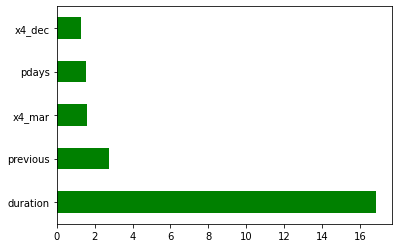

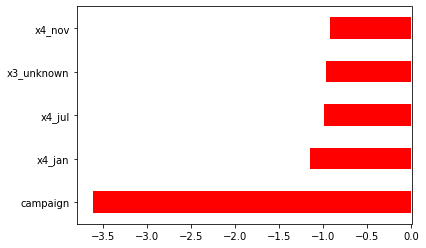

In [80]:
pd.Series(model2.coef_[0], index=X_transformed.columns).nlargest(5).plot(kind='barh',color='green')
plt.show()
pd.Series(model2.coef_[0], index=X_transformed.columns).nsmallest(5).plot(kind='barh',color='red')
plt.show()

## Boost

Обучаем градиентный бустинг

In [76]:
cat = CatBoostClassifier(iterations=1000,
                         depth = 3,
                         learning_rate = 0.01,
                         loss_function='Logloss',
                         eval_metric = 'AUC',
                         verbose=False)
cat.fit(X_transformed, Ytrain)
ohe_boost = cat.predict(X_test_transformed)   
ohe_boost_proba = cat.predict_proba(X_test_transformed)   

Оцениваем результаты

In [77]:
print('Accuracy',round(accuracy_score(Ytest,ohe_boost),2))
print('Precision',round(precision_score(Ytest,ohe_boost),2))
print('Recall',round(recall_score(Ytest,ohe_boost),2))
print('ROC AUC',round(roc_auc_score(Ytest,ohe_boost_proba [:,1]),2))

Accuracy 0.84
Precision 0.82
Recall 0.85
ROC AUC 0.91


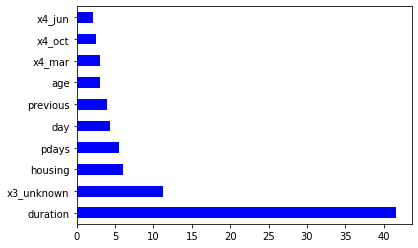

In [78]:
pd.Series(cat.feature_importances_, index=X_transformed.columns).nlargest(10).plot(kind='barh',color='blue')
plt.show()

## Results and Summary

Сводим результаты моделей в одну таблицу

In [79]:
resulting_metrics = pd.DataFrame({
    'Accuracy':[accuracy_score(Ytest,pred_test), accuracy_score(Ytest,ohe_LgRg),accuracy_score(Ytest,pred_test_knn),accuracy_score(Ytest,ohe_boost)],
    'Precision': [precision_score(Ytest,pred_test), precision_score(Ytest,ohe_LgRg), precision_score(Ytest,pred_test_knn),precision_score(Ytest,ohe_boost)],
    'Recall': [recall_score(Ytest,pred_test), recall_score(Ytest,ohe_LgRg), recall_score(Ytest,pred_test_knn),recall_score(Ytest,ohe_boost)],
    'ROC AUC': [roc_auc_score(Ytest,pred_test_proba[:,1]),roc_auc_score(Ytest,ohe_LgRg_proba [:,1]),roc_auc_score(Ytest,pred_test2),roc_auc_score(Ytest,ohe_boost_proba [:,1])]    
}, index= ['LogReg','OHE_LogReg','KNN','OHE_Boost'])
resulting_metrics

,Accuracy,Precision,Recall,ROC AUC
LogReg,0.766034,0.776973,0.719612,0.852250
OHE_LogReg,0.797922,0.810552,0.756152,0.888567
KNN,0.773558,0.762787,0.767338,0.837655
OHE_Boost,0.837334,0.820217,0.847129,0.910706
